In [1]:
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, cauchy, norm, t, kstest

/Users/ruthwik/anaconda3/lib/python3.11/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


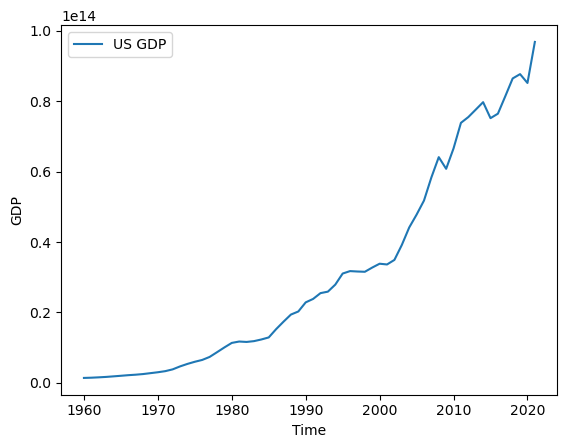

In [2]:
gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country='WLD' , start= '1960', end='2021')
time = np.arange(1960, 2022)
gdp = gdp_data.iloc[:,0].astype(float).to_numpy()

# Data is returned in inverse chronological order, so reverse order
gdp = np.flip(gdp)

# Plot world GDP data against time
plt.plot(time, gdp, label='US GDP')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [3]:
gdp, time

(array([1.38485739e+12, 1.44922062e+12, 1.55081549e+12, 1.67144675e+12,
        1.83049168e+12, 1.99410348e+12, 2.16411810e+12, 2.30257679e+12,
        2.48467446e+12, 2.74049924e+12, 2.99727050e+12, 3.31047549e+12,
        3.81682274e+12, 4.65744519e+12, 5.36681764e+12, 5.97797278e+12,
        6.49874602e+12, 7.34973100e+12, 8.69049694e+12, 1.00537709e+13,
        1.13371326e+13, 1.17284144e+13, 1.16101720e+13, 1.18404810e+13,
        1.23116330e+13, 1.28971786e+13, 1.52525153e+13, 1.73729594e+13,
        1.93940229e+13, 2.02666636e+13, 2.28617120e+13, 2.38344540e+13,
        2.54840246e+13, 2.59059017e+13, 2.78995678e+13, 3.10514992e+13,
        3.17457249e+13, 3.16296945e+13, 3.15528537e+13, 3.27520122e+13,
        3.38455832e+13, 3.36310125e+13, 3.49251166e+13, 3.91616454e+13,
        4.41336159e+13, 4.77935877e+13, 5.17910963e+13, 5.83610968e+13,
        6.41351929e+13, 6.08179196e+13, 6.66197815e+13, 7.38817396e+13,
        7.55259485e+13, 7.76351525e+13, 7.97565172e+13, 7.521506

### 2.1.a. Taking Logarithm of the equation GDP<sub>k</sub> = GDP<sub>0</sub>(1 + r)<sup>k</sup> to arrive at a linear relationship, given by the equation ln(GDP<sub>k</sub>) = ln(GDP<sub>0</sub>) + k ⋅ ln(1 + r)

### 2.1.b

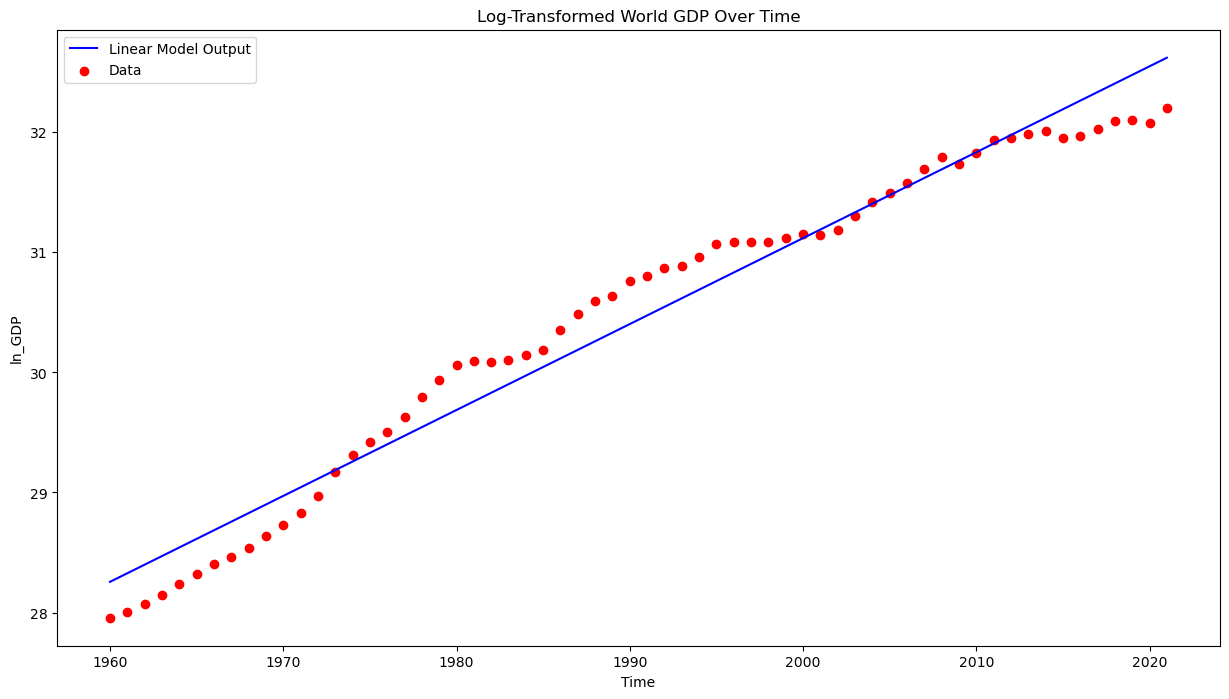

In [4]:
ln_gdp=np.log(gdp)

x = time - 1960

params = linregress(x, ln_gdp)

m = params[0]
c = params[1]


y = m * x + c

plt.figure(figsize=(15, 8))
plt.title('Log-Transformed World GDP Over Time')
plt.plot(time, y, color='blue', label='Linear Model Output')
plt.scatter(time, ln_gdp, color='red', label='Data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('ln_GDP')
plt.show()

### 2.1.b

In [5]:
print(f"R^2 value: {params[2]**2}")

R^2 value: 0.9656784695439928


### 2.1.c

In [6]:
residual = y - ln_gdp
residual_mean, residual_std = np.mean(residual), np.std(residual)
print(f"residual_mean: {residual_mean}, residual_std:{residual_std}")

residual_mean: -1.5471495052840891e-15, residual_std:0.241446271483211


In [7]:
ks_stat_params =  kstest(residual, 'norm', args=(0, residual_std))
print(ks_stat_params)

KstestResult(statistic=0.13053964663291984, pvalue=0.22115691558082406, statistic_location=0.24032364542850004, statistic_sign=-1)


In [8]:
alpha = 0.99
print("Reject Null Hypothesis" if ks_stat_params.pvalue < 1-alpha else "Do not Reject Null Hypothesis")

Do not Reject Null Hypothesis


Since the p-value (0.22115) is greater than the significance level (α = 0.01 or 1%), we do not reject the null hypothesis. Hence, based on the KS test at a 99% confidence level, there is no significant evidence to reject the null hypothesis that the residuals are sampled from a normal distribution with mean 0 and standard deviation σ̂.

### 2.1.d

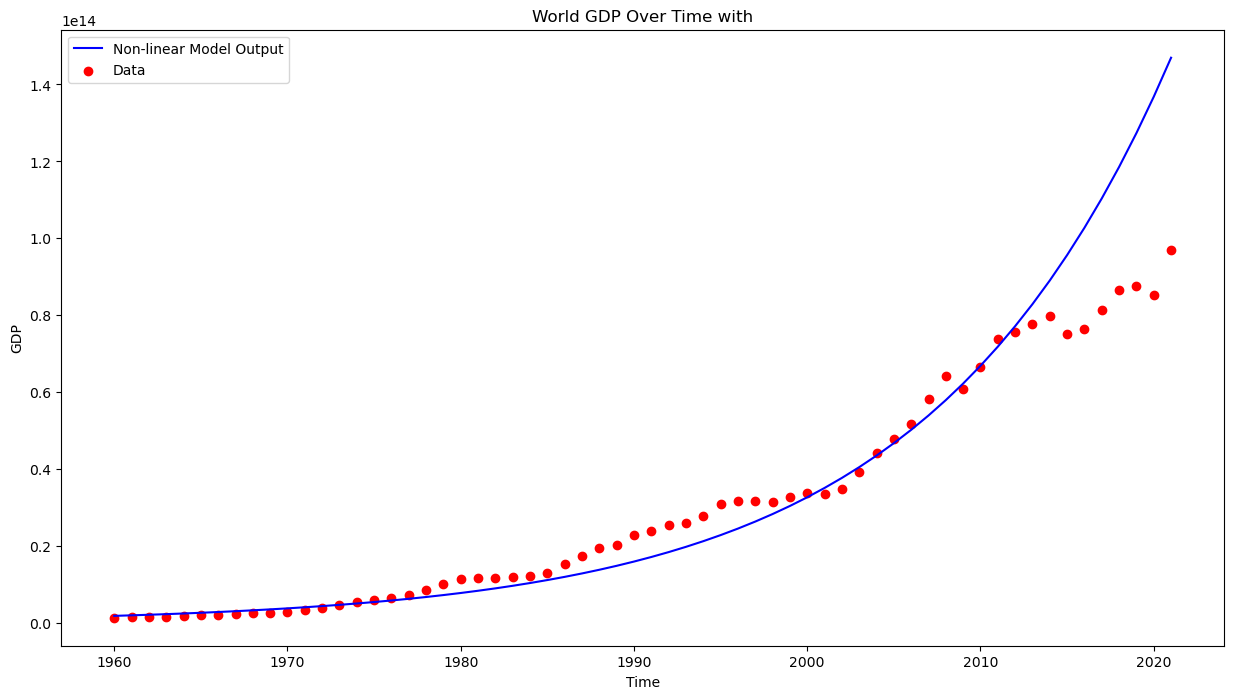

In [9]:
params = linregress(time, ln_gdp)

m = params[0]
c = params[1]

y = np.exp(m * time + c)

plt.figure(figsize=(15, 8))
plt.title('World GDP Over Time with')
plt.plot(time, y, color='blue', label='Non-linear Model Output')
plt.scatter(time, gdp, color='red', label='Data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('GDP')
plt.show()

### 2.1.e

In [10]:
r = np.exp(m)-1
print(f"Long-term growth rate of the world GDP: {r}")

Long-term growth rate of the world GDP: 0.07418942390303673


The relationship between slope and the long term growth rate is given by comparing ln(GDP<sub>k</sub>) = ln(GDP<sub>0</sub>) + k ⋅ ln(1 + r) equation we get above with the equation of Linear Model: $$ y = \beta_0 + \beta_1 x $$
slope=log(1+r) <br>
=>  1+r=exp(slope) <br>
=>  r=exp(slope)-1

### 2.1.f

After 2015, the non-linear model is not capturing the trend in actual gdp data very well. This can be due to the change in growth rate of GDP not being constant. The model assumes a constant growth rate, but when the actual growth rate diverges from the long-term growth, thus model will not fit the data well during those periods.

### 2.2.a

In [11]:
def linear_model(x, beta0, beta1, err=0):
    return beta0 + beta1 * x + err

In [12]:
a=1/2
b=2
N=200
sigma=1/5

x = np.linspace(-5, 5, N)

slopes=[]
intercept=[]
slopes_error = []
intercept_error = []

for i in range(10000):
    epsilon = norm.rvs(scale=sigma, size=N)
    y = linear_model(x, b, a, epsilon)
    params = linregress(x, y)
    slopes.append(params.slope)
    intercept.append(params.intercept)
    slopes_error.append(params.stderr)
    intercept_error.append(params.intercept_stderr)

### 2.2.b

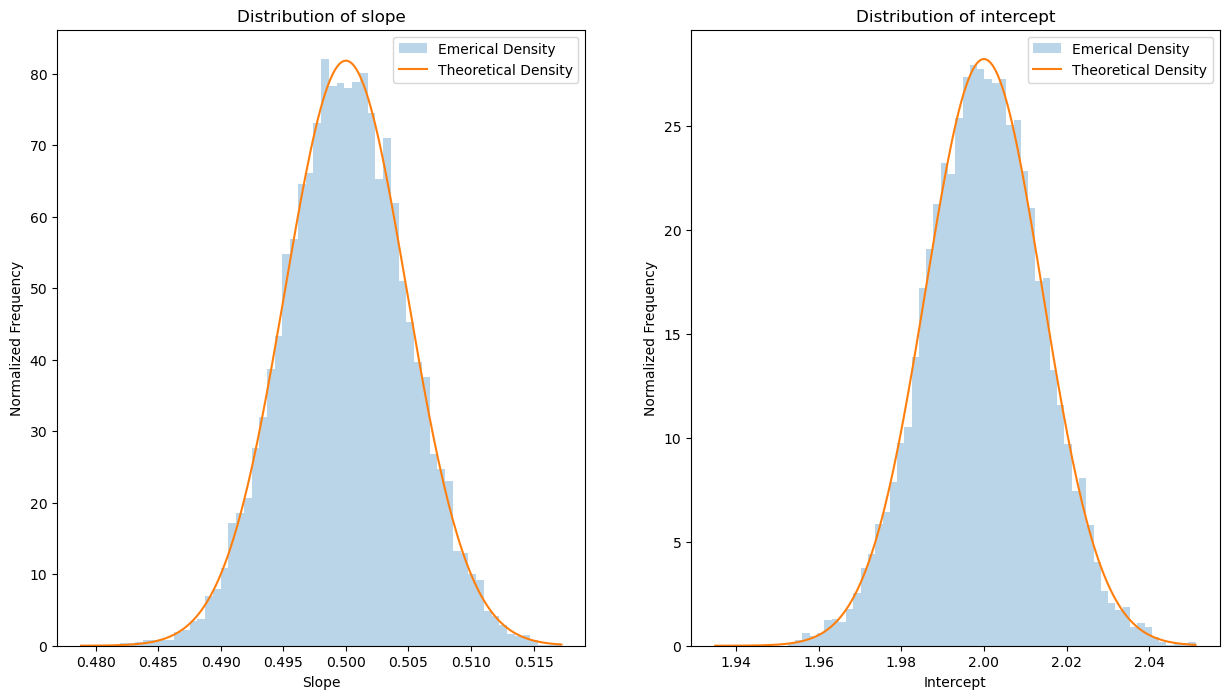

In [13]:
std_epsilon = 1/5
std_slope = std_epsilon / (np.sqrt(np.sum((x - np.mean(x))**2)))
std_intercept = std_epsilon * np.sqrt(np.sum(x**2) / (N * np.sum((x - np.mean(x))**2)))

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].hist(slopes, bins='auto', density=True, alpha=0.3, label='Emerical Density')

x = np.linspace(np.min(slopes), np.max(slopes), N)
slopes_pdf = norm.pdf(x, a, std_slope)

ax[0].plot(x, slopes_pdf, label='Theoretical Density')
ax[0].set_title('Distribution of slope')
ax[0].set_xlabel('Slope')
ax[0].set_ylabel('Normalized Frequency')
ax[0].legend()

ax[1].hist(intercept, bins='auto', density=True, alpha=0.3, label='Emerical Density')
x=np.linspace(np.min(intercept), np.max(intercept), N)
intercept_pdf = norm.pdf(x, b, std_intercept)

ax[1].plot(x, intercept_pdf, label='Theoretical Density')
ax[1].set_title('Distribution of intercept')
ax[1].set_xlabel('Intercept')
ax[1].set_ylabel('Normalized Frequency')

ax[1].legend()
plt.show()

The close alignment between the histogram and the theoretical density suggests that the distribution of the slopes and intercepts closely follows a normal distribution. <br/>
Also, the mean is close to 0.5 (slope) and 2.0 (intercept) implying that parameters were modeled correctly (we generated 10000 linear regression models due to which the mean and standard deviation of these model will  collectively tend theoretical mean and standard deviation (going by the CLT implications)).  

### 2.2.c

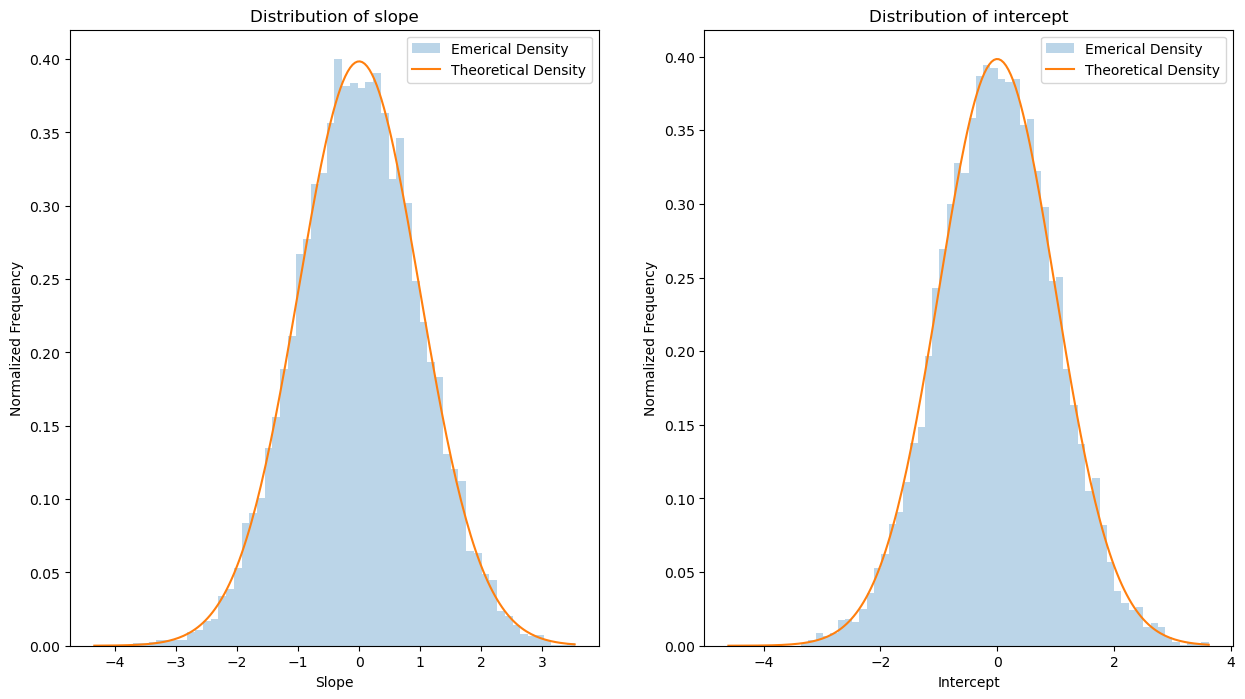

In [14]:
ts_slope = (np.array(slopes) - a) / std_slope
ts_intercpet = (np.array(intercept) - b) / std_intercept

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].set_title('Distribution of slope')
ax[0].hist(ts_slope, bins='auto', density=True, alpha=0.3, label='Emerical Density')
x = np.linspace(np.min(ts_slope), np.max(ts_slope), N)
slopes_pdf = t.pdf(x, df=N-2)
ax[0].plot(x, slopes_pdf, label='Theoretical Density')
ax[0].set_xlabel('Slope')
ax[0].set_ylabel('Normalized Frequency')
ax[0].legend()

ax[1].set_title('Distribution of intercept')
ax[1].hist(ts_intercpet, bins='auto', density=True, alpha=0.3, label='Emerical Density')
x=np.linspace(np.min(ts_intercpet), np.max(ts_intercpet), N)
intercept_pdf = t.pdf(x, df=N-2)
ax[1].plot(x, intercept_pdf, label='Theoretical Density')
ax[1].set_xlabel('Intercept')
ax[1].set_ylabel('Normalized Frequency')

ax[1].legend()
plt.show()


The slope and intercept test statistics both closely reflect the theoretical t-distribution, as demonstrated by the orange line. A good match between the histograms and the t-distribution indicates that the linear regression model has accurately captured features of the data and that the test statistics follow their predicted distribution. (Because both means are zero, the error has no effect on the model assumptions.)

### 2.2.d

In [15]:
last_slope = slopes[-1]
last_inter = intercept[-1]
last_y = y[-1]

residuals = y - (last_inter + last_slope * x)
s_square = np.sum(residuals**2) / (N - 2)
se_slope = np.sqrt(s_square / np.sum((x - np.mean(x))**2))
se_intercept = np.sqrt(s_square * (1/N + np.mean(x)**2 / np.sum((x - np.mean(x))**2)))
t_stat_slope = (last_slope - a) / se_slope
t_stat_intercept = (last_inter - b) / se_intercept


p_value_slope = 2*(1-t.cdf(abs((t_stat_slope)), df = N-2))
p_value_intercept = 2*(1-t.cdf(abs((t_stat_intercept)), df = N-2))
alpha = 0.99

print(f"p-value of slope: {p_value_slope}")
print("Reject Null Hypothesis" if p_value_slope < 1-alpha else "Do not Reject Null Hypothesis")

print(f"p-value of intercept: {p_value_intercept}")
print("Reject Null Hypothesis" if p_value_intercept < 1-alpha else "Do not Reject Null Hypothesis")


p-value of slope: 0.8815516019218077
Do not Reject Null Hypothesis
p-value of intercept: 0.3530325603739377
Do not Reject Null Hypothesis


### 2.2.e

In [16]:
# Constants for the model
a = 1 / 2  # True slope for part (e)
b = 2       # True intercept for part (e)
N = 200     # Number of observations for part (e)
sigma = 1/5
number_of_regressions = 10000

# Generate the x values
x = np.linspace(-5, 5, N)

# Arrays to hold the results of the slopes, intercepts, and their standard errors for part (e)
slopes = np.zeros(number_of_regressions)
intercept = np.zeros(number_of_regressions)
slopesrror = np.zeros(number_of_regressions)
interceptsrror = np.zeros(number_of_regressions)

# Perform 10000 linear regressions with Cauchy distributed errors
for i in range(number_of_regressions):
    # Generate error terms with a Cauchy distribution
    epsilon = cauchy.rvs(scale=sigma, size=N)
    # Generate the y values based on the linear model with Cauchy distributed errors
    y = linear_model(x, b, a, epsilon)
    # Perform linear regression
    result = linregress(x, y)
    # Store the results and their standard errors
    slopes[i] = result.slope
    intercept[i] = result.intercept
    slopesrror[i] = result.stderr
    interceptsrror[i] = result.intercept_stderr

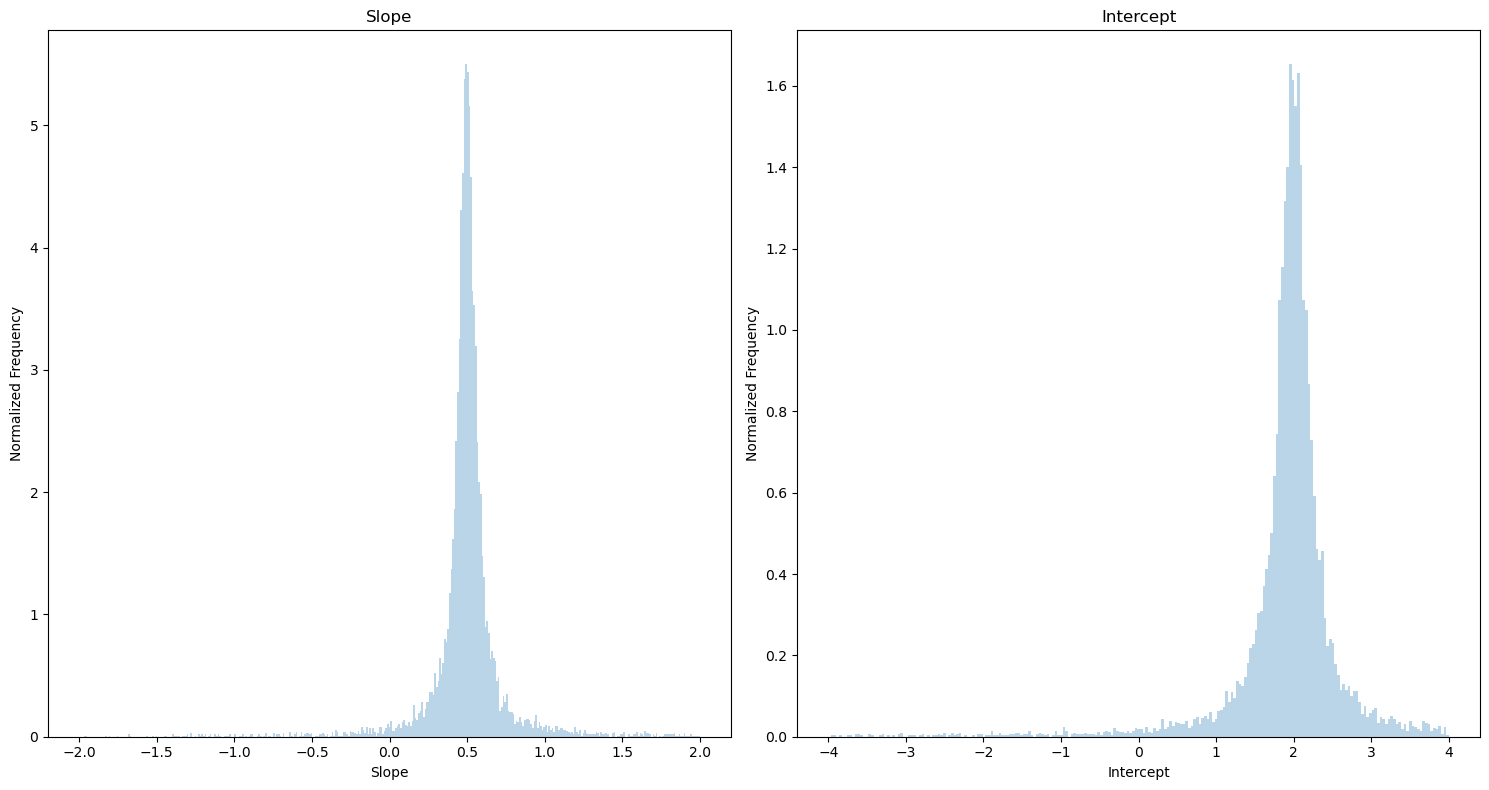

In [17]:
_, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].hist(slopes, bins = 'auto', density = True, alpha = 0.3, range=[-2,2])
ax[0].set_title('Slope')
ax[0].set_xlabel('Slope')
ax[0].set_ylabel('Normalized Frequency')
ax[1].hist(intercept, bins = 'auto', density = True, alpha = 0.3, range=[-4,4])
ax[1].set_title('Intercept')
ax[1].set_xlabel('Intercept')
ax[1].set_ylabel('Normalized Frequency')

plt.tight_layout()
plt.show()

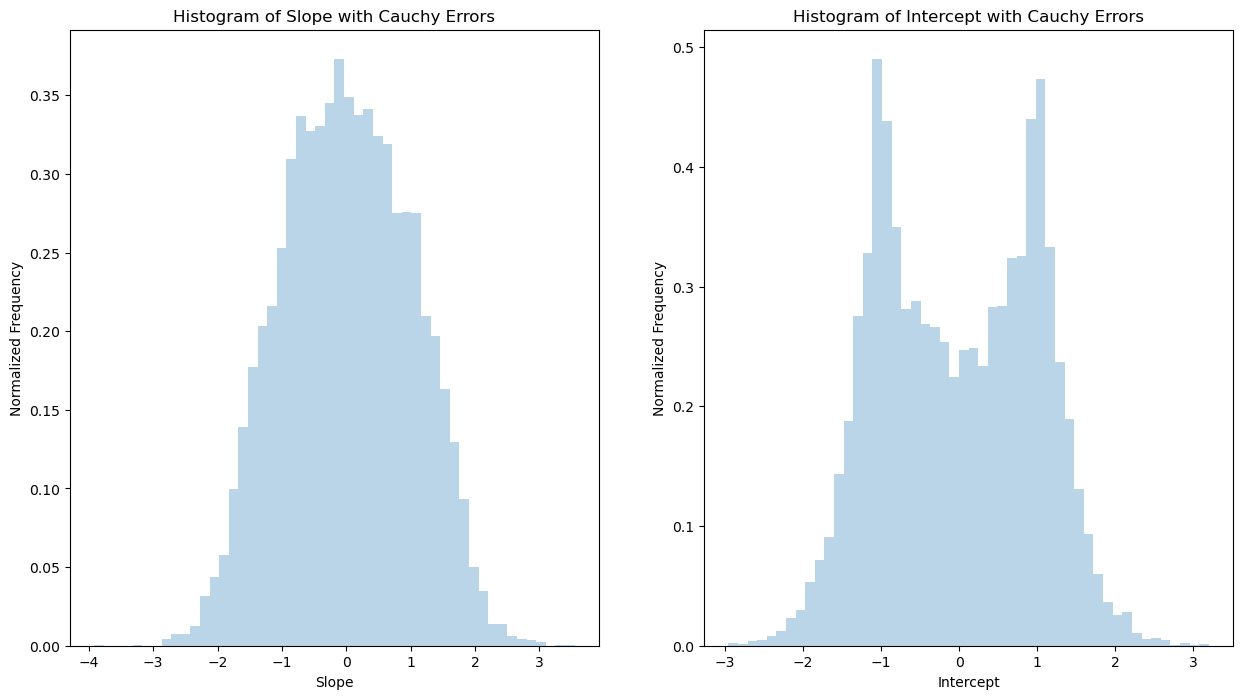

In [18]:
# Part (c) for part (e): Calculate test statistics for slope and intercept with Cauchy errors
test_statistics_slope = (slopes - a) / slopesrror
test_statistics_intercept = (intercept - b) / interceptsrror

# Degrees of freedom for the t-distribution
df = N - 2

# Plotting histograms of the test statistics against their theoretical t-distribution for part (e)
plt.figure(figsize=(15, 8))

# Slope test statistics with Cauchy errors
plt.subplot(1, 2, 1)
plt.title('Histogram of Slope with Cauchy Errors')
plt.hist(test_statistics_slope, bins=50, density=True, alpha=0.3)
plt.xlabel('Slope')
plt.ylabel('Normalized Frequency')

# Intercept test statistics with Cauchy errors
plt.subplot(1, 2, 2)
plt.title('Histogram of Intercept with Cauchy Errors')
plt.hist(test_statistics_intercept, bins=50, density=True, alpha=0.3)
plt.xlabel('Intercept')
plt.ylabel('Normalized Frequency')

plt.show()

The Cauchy distribution is known for its heavy tails, which will result in extreme values. This characteristic appears to be reflected in the histograms, especially for the intercepts, where we observe a long tail. This may indicate that some regressions may have produced intercepts with unusually large magnitudes for intercept. <br/>
These extreme values in the tails could impact stability of regression estimates. This suggests that the regression models can be highly sensitive to outliers.